# Data import for lab

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


def import_subreddit(subreddit):
    location_name = Path().cwd() / 'datasets' / f'{subreddit}.csv'
    return pd.read_csv(location_name)

all_datasets = os.listdir(Path().cwd() / 'datasets')
all_datasets = [x.replace('.csv', '') for x in all_datasets]

subreddits = pd.concat([import_subreddit(subreddit) for subreddit in all_datasets], ignore_index=True)

In [ ]:
subreddits

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'permalink', 'stickied', 'url', 'subreddit_subscribers', 'created_utc',
       'num_crossposts', 'media', 'is_video', 'link_flair_template_id',
       'author_cakeday'],
      dtype='object', length=104)

In [39]:
subreddits['partner'] = subreddits['selftext'].str.lower().str.contains(r'(wife|husband|spouse|partner|girlfriend|boyfriend|fiancee|fiance)')
subreddits['family'] = subreddits['selftext'].str.lower().str.contains(r'(mom|dad|mother|father|sister|brother|aunt|uncle|cousin|niece|nephew|grandmother|grandfather|grandma|grandpa|daughter|son|child|children|kid|kids|parent|parents|family|fam)')
subreddits['friend'] = subreddits['selftext'].str.lower().str.contains(r'(friend|friends|buddy|buddies|pal|pals|mate|mates|companion|companions|acquaintance|acquaintances|chum|chums|confidant|confidants|ally|allies|associate|associates|roommate|roommates|colleague|colleagues|coworker|coworkers|teammate|teammates|classmate|neighbor)')

/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_76406/115280894.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subreddits['partner'] = subreddits['selftext'].str.lower().str.contains(r'(wife|husband|spouse|partner|girlfriend|boyfriend|fiancee|fiance)')
/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_76406/115280894.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subreddits['family'] = subreddits['selftext'].str.lower().str.contains(r'(mom|dad|mother|father|sister|brother|aunt|uncle|cousin|niece|nephew|grandmother|grandfather|grandma|grandpa|daughter|son|child|children|kid|kids|parent|parents|family|fam)')
/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_76406/115280894.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actual

In [53]:
subreddits['day'] = pd.to_datetime(subreddits['created_utc'])

In [54]:
mean_mention = subreddits.groupby(['day'])[['partner', 'family', 'friend']].mean()

In [55]:
mean_mention

,partner,family,friend
day,,,
2024-09-15 03:46:07,1.0,1.0,1.0
2024-09-15 04:23:41,0.0,1.0,1.0
2024-09-15 04:50:05,0.0,1.0,1.0
2024-09-15 07:24:31,0.0,1.0,1.0
2024-09-15 08:52:25,1.0,0.0,0.0
...,...,...,...
2024-10-31 17:30:20,0.0,1.0,1.0
2024-10-31 17:32:24,0.0,0.0,0.0
2024-10-31 17:33:13,1.0,1.0,1.0


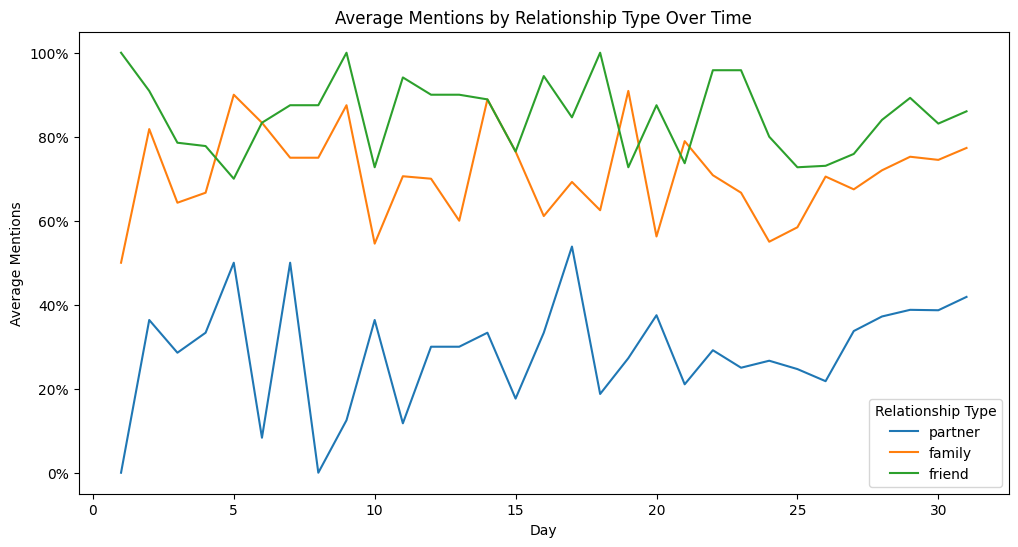

In [52]:

from matplotlib.ticker import FuncFormatter

# Define a function to format the y-axis ticks with a % sign
def to_percent(y, position):
    return f"{y:.0f}%"

# Plotting the average mentions by relationship type
plt.figure(figsize=(12, 6))

# Plot each relationship type with a different color
for relation in mean_mention.columns:
    plt.plot(mean_mention.index, mean_mention[relation] * 100, label=relation)  # Multiply by 100 for percentage

# Adding labels and title
plt.xlabel("Day")
plt.ylabel("Average Mentions")
plt.title("Average Mentions by Relationship Type Over Time")

# Apply the percentage formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# Add legend to differentiate relationship types
plt.legend(title="Relationship Type")

plt.show()
